# Business Data Science | Fall 2019
## Assignment 4
### Rutwick Bhawsar | Shivang Arya


In [1]:
import math
import pandas as pd
import numpy as np
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from string import punctuation
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import os
import glob
from sklearn.linear_model import LassoCV
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,accuracy_score
nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aryas_000\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aryas_000\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

## Problem 1

Using GridSearchCV to tune the best parameters for a particular metric and algorithm. 

In [2]:
### Directly Copy-Pasted the code from the given URL
### Please check out comments for our understanding of the code

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# These are the two metrics on which the parameters will be tuned.
scores = ['precision', 'recall']

#For loop which will run twice - Once for Precision metric and once for Recall metric
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    # The algorithm used is SVC - Supprot Vector Classifier with a cross validation k of 5
    # The mteric used for tuning is stored in the variable score
    
    clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    
    # The best parameters for the particular metric are output
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.986 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.029) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.975 (+/-0.014) for {'C': 1, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 10, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 100, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model 

## Problem 2

In [5]:
### Used the data generation from the Lecture 7 Notebook. 

# generate some sparse data to play with
np.random.seed(7)

n_samples, n_features = 100, 200
X = np.random.randn(n_samples, n_features)

k = 5
# beta generated with k nonzeros
#coef = 10 * np.random.randn(n_features)
coef = 10 * np.ones(n_features)
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[k:]] = 0  # sparsify coef
y = np.dot(X, coef)

# add noise
y += 0.01 * np.random.normal((n_samples,))

# Split data in train set and test set
n_samples = X.shape[0]

We want to store the DataFrame in a way where column are stored in descending order of their correlation to the output column.

In [6]:
### Getting the X and y data in a DataFrame

X_pd = pd.DataFrame(data=X[0:,0:])
X_pd.loc[:,'y'] = y

### Finding the correlation of all columns with the y column 
corrdf = pd.DataFrame(X_pd[X_pd.columns[0:]].corr()['y'][:])
corrdf['y'] = abs(corrdf['y'])

### Displaying in Desceding order
corrdf = corrdf.sort_values(by='y',ascending = False)
corrdf.head(10)

,y
y,1.000000
18,0.483345
51,0.420086
15,0.402449
34,0.390211
78,0.381430
102,0.285795
138,0.271657
182,0.260708
87,0.248765


In [7]:
### Rearranging the DataFrame so that the 1st column is the one with max correlation and so on. 

X_final = pd.DataFrame()
for i in range(1,201):
    index = corrdf.iloc[i:i+1,].index.values[0]
    X_final[str(index)] = X_pd[index]
    X_final.head()
X_final.head(10)

,18,51,15,34,78,102,138,182,87,156,...,45,10,115,188,73,123,99,12,198,65
0,0.274460,0.237302,-1.453241,-2.064415,-0.192855,0.391546,-1.951978,0.300680,1.296885,-1.556288,...,-1.803099,-0.625429,0.182901,-0.258316,1.438240,0.130623,-0.471927,0.505299,0.938852,-0.889857
1,-0.194882,-0.229804,-0.573274,0.396565,-2.305183,-1.588248,-0.099209,-0.308604,-1.101500,-2.299249,...,-1.172917,-1.137137,-0.614479,0.403560,-0.723885,-1.159187,-0.602511,0.593128,1.542483,0.062576
2,0.488282,-0.988185,0.848917,0.479785,0.421047,0.477926,-1.026078,1.896838,-0.140851,0.569053,...,-0.366253,0.993543,-0.249485,1.653950,0.190673,-0.782583,0.266761,-0.830049,1.904306,1.075762
3,0.631719,1.304835,0.622682,0.598888,0.041790,1.143813,0.778634,1.166233,0.629138,-0.270691,...,0.572573,0.227200,0.891185,-0.519133,0.073144,0.108269,-0.496647,-0.225706,-0.410920,-1.281758
4,0.813596,0.258991,-0.752411,-0.684329,0.323307,-0.727420,-0.586270,-0.338133,-0.745675,1.557663,...,1.554035,-0.127851,-0.055148,1.349904,-0.572191,-0.304953,2.594645,-0.468176,-0.628522,1.022980
5,1.303778,0.611581,0.582409,2.363380,-1.605997,-0.219689,-0.635812,2.192579,-1.480404,-1.371873,...,-0.890168,-0.730026,-1.093726,0.760483,0.044862,-0.443249,1.561071,0.156858,1.922891,0.528620
6,-0.965491,-0.367912,-0.730048,0.084938,1.109510,0.691170,-0.953852,-0.337736,-0.348009,-0.731000,...,1.529995,-0.620454,-0.098334,0.650499,-1.690561,-1.639290,2.070088,0.060698,-0.536481,0.491345
7,0.255816,0.085576,-1.186857,-0.142046,1.436720,-1.487090,-0.722448,-1.150186,0.197510,0.255473,...,0.111627,2.581024,0.077887,0.983285,0.322653,0.250613,-0.219593,0.999784,0.389767,-0.669095
8,2.458816,1.493474,-2.363043,-1.641857,-0.214203,0.545713,-0.128687,-0.761492,-0.773469,-0.069940,...,-0.826209,-0.727575,-1.421868,0.677256,-0.589085,-0.438595,1.018776,-0.246916,-0.861613,-1.775102
9,-0.878473,0.898426,-0.321462,-1.177261,2.363793,-0.283415,-1.221992,-1.606781,-2.037449,-0.854914,...,-0.124971,0.337063,0.083710,0.995614,-1.635137,-0.237267,0.420736,1.574651,-0.256921,-0.224881


In [8]:
### Splitting test and train data.

X_train, y_train = X_final.iloc[:25,:], y[:25]
X_test, y_test = X_final.iloc[25:,:], y[25:]

In [9]:
### Running Lasso while adding features one at a time

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

### Choosing alpha value as 1

alpha = 1
lasso = Lasso(alpha=alpha)
mse = np.array([])

### Running the loop 200 times since we a total of 200 features. 

for i in range(1,200):
    y_pred_lasso = lasso.fit(X_train.iloc[:,:i], y_train).predict(X_test.iloc[:,:i])
    r2_score_lasso = r2_score(y_test, y_pred_lasso)
    #print(lasso)
    print("\nNumber of features chosen: ",i)
    print("R^2 on test data : ",r2_score_lasso)
    msee = mean_squared_error(y_test,y_pred_lasso) 
    mse = np.append(mse,msee)
    print("Test Error test data : ", msee)
    
### We have chosen features from left to right. 
### 1st column being highest correlation 
### 200th Column being lowest correlation


Number of features chosen:  1
R^2 on test data :  0.2126042581283797
Test Error test data :  313.76542252241563

Number of features chosen:  2
R^2 on test data :  0.3696211751491346
Test Error test data :  251.19653029666006

Number of features chosen:  3
R^2 on test data :  0.4067563464526047
Test Error test data :  236.39872012971696

Number of features chosen:  4
R^2 on test data :  0.6690571273437752
Test Error test data :  131.87578335506484

Number of features chosen:  5
R^2 on test data :  0.9621673148499498
Test Error test data :  15.075758998958943

Number of features chosen:  6
R^2 on test data :  0.9621651185770854
Test Error test data :  15.076634180835866

Number of features chosen:  7
R^2 on test data :  0.9621651185770854
Test Error test data :  15.076634180835866

Number of features chosen:  8
R^2 on test data :  0.9621654823027102
Test Error test data :  15.076489241616306

Number of features chosen:  9
R^2 on test data :  0.9621762695830924
Test Error test data :  15


Number of features chosen:  112
R^2 on test data :  0.8588844777948399
Test Error test data :  56.232424300298675

Number of features chosen:  113
R^2 on test data :  0.8588844777948399
Test Error test data :  56.232424300298675

Number of features chosen:  114
R^2 on test data :  0.8588844777948399
Test Error test data :  56.232424300298675

Number of features chosen:  115
R^2 on test data :  0.8588844777948399
Test Error test data :  56.232424300298675

Number of features chosen:  116
R^2 on test data :  0.8588844777948399
Test Error test data :  56.232424300298675

Number of features chosen:  117
R^2 on test data :  0.8588844777948399
Test Error test data :  56.232424300298675

Number of features chosen:  118
R^2 on test data :  0.8588844777948399
Test Error test data :  56.232424300298675

Number of features chosen:  119
R^2 on test data :  0.8588844777948399
Test Error test data :  56.232424300298675

Number of features chosen:  120
R^2 on test data :  0.8588844777948399
Test Err


Number of features chosen:  199
R^2 on test data :  0.8064978310193543
Test Error test data :  77.10771925804397


### Problem 2. Question 2

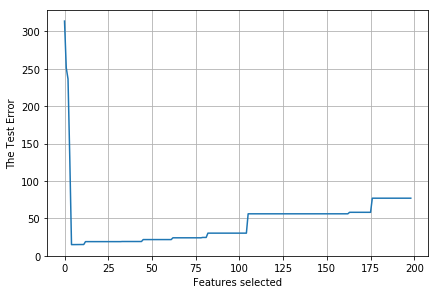

In [10]:
### Plotting the Test error against features selected.

plt.figure(figsize = (6,4))
plt.grid()
plt.plot(mse)
plt.tight_layout()
plt.xlabel('Features selected')
plt.ylabel('The Test Error')
plt.show()

In [11]:
optimum = np.argmin(mse)
print("The features for which Test Error is minimum is: 0 -",optimum)
print("The minimum Test Error: ",mse.min())
print("\nTherefore, we can say that if we choose the top",optimum,"most correlated columns (Correlated to the output variable), we will get the minimum error using Lasso")
print("\nThe Test Error when all 200 features are selected is:", msee)

The features for which Test Error is minimum is: 0 - 8
The minimum Test Error:  15.072190671777731

Therefore, we can say that if we choose the top 8 most correlated columns (Correlated to the output variable), we will get the minimum error using Lasso

The Test Error when all 200 features are selected is: 77.10771925804397


### Problem 2. Question 3

In [12]:
### Function to manually implement cross-validation.

X_train, y_train = X[:25], y[:25]
X_test, y_test = X[25:], y[25:]

### Here the model is the ML Model we want to use and i is the value of k in cross-validation.

def rmse_cv(model,i):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = i))
    return(rmse)

Text(0, 0.5, 'Test Error')

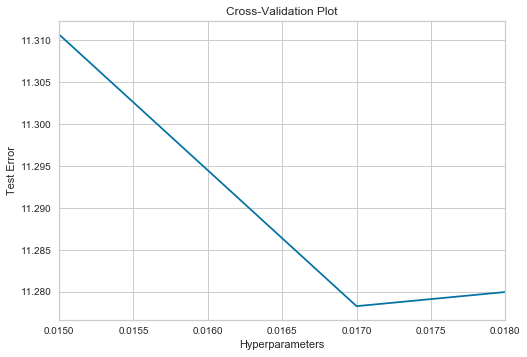

In [312]:
### Implementing cross-validation with k = 10. We get the optimum value of alpha. 

hyperparam = [0.015,0.017,0.018]

### Calling the Cross-Validation function with k =10.
cv_lasso = [rmse_cv(Lasso(alpha = alpha),10).mean() 
            for alpha in hyperparam]
cv_lasso = pd.Series(cv_lasso, index = hyperparam)

### Plotting the graph of alpha vs test error.

cv_lasso.plot(title = "Cross-Validation Plot")
plt.xlabel("Hyperparameters")
plt.ylabel("Test Error")

From the graph we notice that the optimal hyperparameter for cv = 10 is 0.017

### Problem 2. Question 4

The optimal hyperparameter for CV folds =  2 is: 0.007
The optimal hyperparameter for CV folds =  5 is: 0.01
The optimal hyperparameter for CV folds =  10 is: 0.017
The optimal hyperparameter for CV folds =  15 is: 0.015
The optimal hyperparameter for CV folds =  20 is: 0.043000000000000003


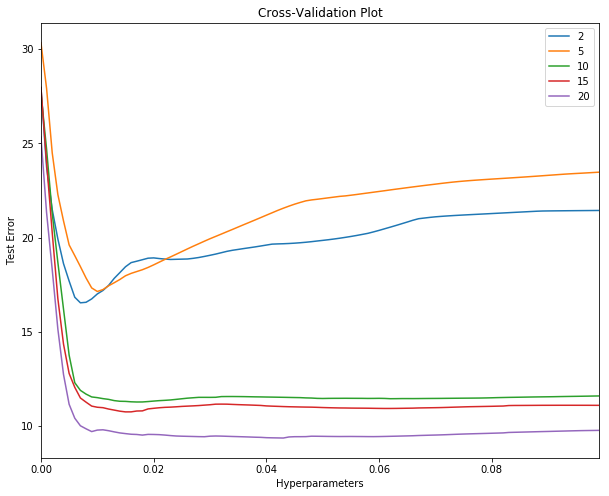

In [13]:
### We are implementing cross-validaton with folds = 2,5,10,20

### Checking for all alphas between 0 and 0.1
alls = np.arange(0,.1,0.001)

hyperparam = alls.tolist()
plt.figure(figsize=(10,8))

optalphsmanual = np.array([])
### Defining the folds
cv = [2,5,10,15,20]
for i in cv:   
    cv_lasso = [rmse_cv(Lasso(alpha = alpha),i).mean()
                for alpha in hyperparam]
    cv_lasso = pd.Series(cv_lasso, index = hyperparam)
    cv_lasso.plot(title = "Cross-Validation Plot",label = i)
    plt.xlabel("Hyperparameters")
    plt.ylabel("Test Error")
    plt.legend()
    print("The optimal hyperparameter for CV folds = ",i,"is:",cv_lasso.argmin())
    optalphsmanual = np.append(optalphsmanual,cv_lasso.argmin())

In [14]:
### Confirming the optimal parameter we got from manual cross-validation with GridSearchCV.

for i in cv:
    print()
    param = {'alpha': hyperparam}
    LR = GridSearchCV(Lasso(),param,scoring='neg_mean_squared_error',cv=i)
    LR.fit(X_train,y_train)
    print("The optimal hyperparameter for CV folds = ",i,"is:",LR.best_params_)


The optimal hyperparameter for CV folds =  2 is: {'alpha': 0.007}

The optimal hyperparameter for CV folds =  5 is: {'alpha': 0.01}

The optimal hyperparameter for CV folds =  10 is: {'alpha': 0.018000000000000002}

The optimal hyperparameter for CV folds =  15 is: {'alpha': 0.014}

The optimal hyperparameter for CV folds =  20 is: {'alpha': 0.013000000000000001}


### Problem 2. Question 5

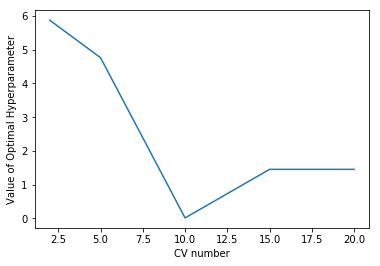

In [15]:
### Using LassoCV directly
### We've still kept the folds values to be 2,5,10, 15 and 20

alph = np.array([])
for i in cv:
    reg = LassoCV(cv=i, random_state=0).fit(X_train, y_train)
    alph = np.append(alph,reg.alpha_)

plt.plot(cv,alph)
plt.xlabel('CV number')
plt.ylabel('Value of Optimal Hyperparameter')
plt.show()

In [16]:
print("The values of the optimal hyperparameters:",alph)

The values of the optimal hyperparameters: [5.87215072 4.76308249 0.01559695 1.45457657 1.45457657]


Comparing the Values of optimal alphas we got by LassoCV and by manual Cross-Valiation.

In [17]:
print("The values of the optimal hyperparameters from LassoCV:",alph)
print("The values of the optimal hyperparameters from manual CV:",optalphsmanual)

The values of the optimal hyperparameters from LassoCV: [5.87215072 4.76308249 0.01559695 1.45457657 1.45457657]
The values of the optimal hyperparameters from manual CV: [0.007 0.01  0.017 0.015 0.043]


Here you can see that the optimal values of the hyperparameters chosen by manual CV folds selection are mostly different compared to those chosen by LassoCV. We think this is due to the n_alphas parameter of the LassoCV model. By default the n_alphas take a value of 100 which means the number of alphas tested along the regularization path is only 100. By comparison, the number of alphas we hardcoded for our manual CV and GridSearch CV are 1000.

Also the range of alphas, we provided to manual and GridSearch were after a lot of trial and error to try and get a relevant range. After knowing that the alpha will lie between 0 and 0.1 we gave 1000 values in between. This doesn't happen with LassoCV. 

For one value though, CV folds = 10 we got roughly 0.017 as our optimal hyperparameter through both the algorithms. 

## Problem 3. 
Summarizing 'A Mathematical Theory of Communication'.

The fundamental problem of communication is that of reproducing at one point either exactly or approximately a message selected at another point. Frequently the messages have meaning; that is they refer to or are correlated according to some system with certain physical or conceptual entities. The natural choice to choose a message from a set of messages is a logarithmic function because: it is practically more useful, closer to our intuition of proper measure, mathematically suitable.
Communications system contains 5 parts: Information source, Transmitter, Channel, Receiver and Destination; and three categories: Discrete, Continuous and Mixed.


<b><u>Talking about the discrete noiseless system:</b></u> <br><br>
<b>Channel:</b> Examples are teletype and telegraphy to transfer choice of symbols from one point to another. Telegraphy may allow the following symbols: dot, dash, letter space, word space based on its capacity. Capacity is given by the quotient of log of number of allowed signals of duration T and the duration T where T is tending to 0. There can be a restriction on different sequences during transmission (example if only certain symbols can be transmitted). If the restrictions can be described, the capacity can be calculated using Theorem 1.


<b>Source of Information:</b> The existence of a structure to the symbols allows time saving (and capacity saving) by properly encoding the message sequence into signal sequences. A physical system, or a mathematical model of a system which produces a sequence of symbols governed by a set of probabilities, is known as a stochastic process. Discrete sources for stochastic processes: written languages (English, German, Chinese), quantized continuous information sources, mathematical cases (assigning probabilities to different symbols and choosing them independently of depending on the previous symbols). These artificial languages are useful in constructing simple problems and examples to illustrate various possibilities.


<b>Series of approximations to English:</b> We have a 27 symbol alphabet, 26 letters and a space. Approximations are: Zero-order approximation (symbols independent and equiprobable), First-order approximation (symbols independent but with frequencies of English text), Second-order approximation (digram structure as in English), Third-order approximation (trigram structure as in English), First-order word approximation (words are chosen independently but with their appropriate frequencies), Second-order word approximation (the word transition probabilities are correct but no further structure is included). The resemblance to English increases with each of the above mentioned steps. 


<b>Graphical Representation of a Markoff Process:</b> Stochastic processes of the type described above are known mathematically as discrete Markoff processes. There exist a finite number of possible states of a system along with a set of transition probabilities. We assume that a letter is produced for each state transition.  


<b>Ergodic and Mixed Sources:</b> Ergodic processes is a group of Markoff processes with special properties of significance in communication theory. In an ergodic process, every sequence produced is the same in statistical properties (statistical homogeneity). 


<b>Choice, Uncertainty and Entropy:</b> Finding a measure of how much “choice” is involved in selecting an event or the uncertainty of the outcome. Assumptions: A measure should be continuous in the set of probabilities; If all outcomes are equally likely, the measure would be a monotonically increasing function of the number of outcomes; If a choice is broken down into further choices, the original measure should be a weighted sum of individual measures of choices. The only measure that satisfies all three assumptions is given in Theorem 2. The form of measure is recognized as that of entropy in certain formulations of statistical mechanics. The uncertainty of an event ‘y’ is never increased by knowledge of an event ‘x’. It will be decreased unless x and y are independent, in which case it is not changed. 


<b>Entropy of an Information Source:</b> For each possible state, there will be a set of probabilities of producing various possible symbols. Thus, there is an entropy for each state. Total entropy of source will be defined as the weighted average of entropies of each state. This is the entropy of the source per symbol of text. If the Markoff process is proceeding at a definite time rate there is also an entropy per second which is equal to the number of symbols produced per second multiplied by the entropy per symbol. Given a long message of N symbols, we can calculate the probability of any particular message and find out entropy for that particular message which turn out to be approximately the logarithm of the reciprocal probability of a typical long sequence divided by the number of symbols in the sequence. This value of entropy only stands if Theorem 3 classifies the message as long. Theorem 4 gives the value of entropy when the sequences of length N are arranged in decreasing order of probability. The next two theorems show that entropy can be determined by limiting operations directly from the statistics of the message sequences, without reference to the states and transition probabilities between states. The ratio of the entropy of a source to the maximum value it could have while still restricted to the same symbols will be called its relative entropy. This is the maximum compression possible when we encode into the same alphabet. One minus the relative entropy is the redundancy. 


<b>Representation of Encoding and Decoding Operations:</b> Transducer is a term given to the transmitter or receiver when it performs encoding or decoding operations. Transducer has a finite internal memory such that the output depends not only on the present input signal but also on the past history (output is a function of the present state and the present input symbol). Theorem 7: The output of a finite state transducer driven by a finite state statistical source is a finite state statistical source, with entropy (per unit time) less than or equal to that of the input (output symbols of one transducer can be identified with the input symbols of a second, they can be connected in tandem and the result is also a transducer). If the transducer is non-singular they are equal (second transducer which operates on the output of the first and recovers the original input, the first transducer will be called non-singular and the second will be called its inverse).


<b>Fundamental Theorem for a Noiseless Channel:</b> Theorem 9: Let a source have entropy H (bits per symbol) and a channel have a capacity C (bits per second). Then it is possible to encode the output of the source in such a way as to transmit at the average rate (C/H – e) symbols per second over the channel where ‘e’ is arbitrarily small. It is not possible to transmit at an average rate greater than C/H.


## Problem 4. 

In [ ]:
### Scraping the PDF's from the given URL and saving them to out laptop.

url = "http://proceedings.mlr.press/v97/"

#If there is no such folder, the script will create one automatically
folder_location = r'E:\Usr\UT_BDS\Problem Set 4'
if not os.path.exists(folder_location):os.mkdir(folder_location)

response = requests.get(url)
soup= BeautifulSoup(response.text, "html.parser")     
for link in soup.select("a[href$='.pdf']"):
    #Name the pdf files using the last portion of each link which are unique in this case
    filename = os.path.join(folder_location,link['href'].split('/')[-1])
    with open(filename, 'wb') as f:
        f.write(requests.get(urljoin(url,link['href'])).content)

In [4]:
### Converting the saved pdfs to text and saving it in a file titled PDFtoTextFinal.txt
### This step can take hours to run. For your convenience please skip to the next step. 
### We have submitted out PdftoTextFinal.txt along with our notebook.

from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import BytesIO
 
def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = BytesIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text
 
pdflist = glob.glob('Already\*.pdf')
for pdf in pdflist:
    try:
        print("Working on: " + pdf + '\n')
        fout = open('PDFtoTextFinal.txt','ab+')
        text = convert_pdf_to_txt(pdf)
        text.decode('utf-8')
        fout.write(text)
        fout.close()
    except:
        print("Error on this.. ")
        continue

Working on: Already\abbati19a-supp.pdf

Working on: Already\abbati19a.pdf

Working on: Already\abels19a-supp.pdf

Working on: Already\abels19a.pdf

Working on: Already\abu-el-haija19a-supp.pdf

Working on: Already\abu-el-haija19a.pdf

Working on: Already\acharya19a-supp.pdf

Working on: Already\acharya19a.pdf

Working on: Already\acharya19b-supp.pdf

Working on: Already\acharya19b.pdf

Working on: Already\acharya19c.pdf

Working on: Already\adams19a-supp.pdf

Working on: Already\adams19a.pdf

Working on: Already\adel19a-supp.pdf

Working on: Already\adel19a.pdf

Working on: Already\adiga19a.pdf

Working on: Already\agarwal19a.pdf

Working on: Already\agarwal19b-supp.pdf

Working on: Already\agarwal19b.pdf

Working on: Already\agarwal19c-supp.pdf

Working on: Already\agarwal19c.pdf

Working on: Already\agarwal19d-supp.pdf

Working on: Already\agarwal19d.pdf

Working on: Already\agarwal19e-supp.pdf

Working on: Already\agarwal19e.pdf

Working on: Already\agrawal19a-supp.pdf

Working on: 

Working on: Already\choromanska19a-supp.pdf

Working on: Already\choromanska19a.pdf

Working on: Already\choromanski19a.pdf

Working on: Already\chu19a-supp.pdf

Working on: Already\chu19a.pdf

Working on: Already\chu19b-supp.pdf

Working on: Already\chu19b.pdf

Working on: Already\chung19a-supp.pdf

Working on: Already\chung19a.pdf

Working on: Already\cicalese19a-supp.pdf

Working on: Already\cicalese19a.pdf

Working on: Already\cinelli19a-supp.pdf

Working on: Already\cinelli19a.pdf

Working on: Already\clarkson19a-supp.pdf

Working on: Already\clarkson19a.pdf

Working on: Already\clemencon19a-supp.pdf

Working on: Already\clemencon19a.pdf

Working on: Already\cobbe19a-supp.pdf

Working on: Already\cobbe19a.pdf

Working on: Already\cohen19a-supp.pdf

Working on: Already\cohen19a.pdf

Working on: Already\cohen19b.pdf

Working on: Already\cohen19c-supp.pdf

Working on: Already\cohen19c.pdf

Working on: Already\cohen19d-supp.pdf

Working on: Already\cohen19d.pdf

Working on: Already\co

Working on: Already\grant19a.pdf

Working on: Already\greaves-tunnell19a.pdf

Working on: Already\greenberg19a-supp.pdf

Working on: Already\greenberg19a.pdf

Working on: Already\greenfeld19a-supp.pdf

Working on: Already\greenfeld19a.pdf

Working on: Already\greff19a-supp.pdf

Working on: Already\greff19a.pdf

Working on: Already\grover19a-supp.pdf

Working on: Already\grover19a.pdf

Working on: Already\gu19a.pdf

Working on: Already\guan19a.pdf

Working on: Already\guez19a-supp.pdf

Working on: Already\guez19a.pdf

Working on: Already\gultchin19a-supp.pdf

Working on: Already\gultchin19a.pdf

Working on: Already\guo19a-supp.pdf

Working on: Already\guo19a.pdf

Working on: Already\guo19b-supp.pdf

Working on: Already\guo19b.pdf

Working on: Already\guo19c-supp.pdf

Working on: Already\guo19c.pdf

Working on: Already\gural19a-supp.pdf

Working on: Already\gural19a.pdf

Working on: Already\haber19a.pdf

Working on: Already\hacohen19a-supp.pdf

Working on: Already\hacohen19a.pdf

Working

Working on: Already\kusner19a.pdf

Working on: Already\kveton19a-supp.pdf

Working on: Already\kveton19a.pdf

Working on: Already\labatie19a-supp.pdf

Working on: Already\labatie19a.pdf

Working on: Already\lamb19a.pdf

Working on: Already\lamprier19a-supp.pdf

Working on: Already\lamprier19a.pdf

Working on: Already\lange19a-supp.pdf

Working on: Already\lange19a.pdf

Working on: Already\laroche19a-supp.pdf

Working on: Already\laroche19a.pdf

Working on: Already\lattanzi19a.pdf

Working on: Already\law19a-supp.pdf

Working on: Already\law19a.pdf

Working on: Already\lawrence19a-supp.pdf

Working on: Already\lawrence19a.pdf

Working on: Already\lazic19a-supp.pdf

Working on: Already\lazic19a.pdf

Working on: Already\le19a-supp.pdf

Working on: Already\le19a.pdf

Working on: Already\lee19a-supp.pdf

Working on: Already\lee19a.pdf

Working on: Already\lee19b-supp.pdf

Working on: Already\lee19b.pdf

Working on: Already\lee19c.pdf

Working on: Already\lee19d-supp.pdf

Working on: Already

Working on: Already\nguyen19c.pdf

Working on: Already\nirwan19a.pdf

Working on: Already\nock19a-supp.pdf

Working on: Already\nock19a.pdf

Working on: Already\nokland19a-supp.pdf

Working on: Already\nokland19a.pdf

Working on: Already\novati19a.pdf

Working on: Already\nye19a-supp.pdf

Working on: Already\nye19a.pdf

Working on: Already\obermeyer19a-supp.pdf

Working on: Already\obermeyer19a.pdf

Working on: Already\oberst19a-supp.pdf

Working on: Already\oberst19a.pdf

Working on: Already\ochs19a-supp.pdf

Working on: Already\ochs19a.pdf

Working on: Already\odena19a.pdf

Working on: Already\oglic19a-supp.pdf

Working on: Already\oglic19a.pdf

Working on: Already\oono19a-supp.pdf

Working on: Already\oono19a.pdf

Working on: Already\oprescu19a-supp.pdf

Working on: Already\oprescu19a.pdf

Working on: Already\osama19a-supp.pdf

Working on: Already\osama19a.pdf

Working on: Already\oymak19a-supp.pdf

Working on: Already\oymak19a.pdf

Working on: Already\panageas19a-supp.pdf

Working 

Working on: Already\su19b.pdf

Working on: Already\sun19a-supp.pdf

Working on: Already\sun19a.pdf

Working on: Already\sun19b-supp.pdf

Working on: Already\sun19b.pdf

Working on: Already\sundin19a-supp.pdf

Working on: Already\sundin19a.pdf

Working on: Already\suter19a-supp.pdf

Working on: Already\suter19a.pdf

Working on: Already\suzuki19a-supp.pdf

Working on: Already\suzuki19a.pdf

Working on: Already\taghvaei19a-supp.pdf

Working on: Already\taghvaei19a.pdf

Working on: Already\tai19a-supp.pdf

Working on: Already\tai19a.pdf

Working on: Already\tallec19a-supp.pdf

Working on: Already\tallec19a.pdf

Working on: Already\tan19a.pdf

Working on: Already\tan19b-supp.pdf

Working on: Already\tan19b.pdf

Working on: Already\tang19a.pdf

Working on: Already\tang19b-supp.pdf

Working on: Already\tang19b.pdf

Working on: Already\tang19c-supp.pdf

Working on: Already\tang19c.pdf

Working on: Already\tang19d-supp.pdf

Working on: Already\tang19d.pdf

Working on: Already\tanno19a-supp.pdf


Working on: Already\yun19a.pdf

Working on: Already\yurochkin19a-supp.pdf

Working on: Already\yurochkin19a.pdf

Working on: Already\yurochkin19b-supp.pdf

Working on: Already\yurochkin19b.pdf

Working on: Already\yurtsever19a-supp.pdf

Working on: Already\yurtsever19a.pdf

Working on: Already\yurtsever19b-supp.pdf

Working on: Already\yurtsever19b.pdf

Working on: Already\zablocki19a-supp.pdf

Working on: Already\zablocki19a.pdf

Working on: Already\zanette19a.pdf

Working on: Already\zeng19a-supp.pdf

Working on: Already\zeng19a.pdf

Working on: Already\zhang19a.pdf

Working on: Already\zhang19b.pdf

Working on: Already\zhang19c-supp.pdf

Working on: Already\zhang19c.pdf

Working on: Already\zhang19d.pdf

Working on: Already\zhang19e-supp.pdf

Working on: Already\zhang19e.pdf

Working on: Already\zhang19f.pdf

Working on: Already\zhang19g.pdf

Working on: Already\zhang19h-supp.pdf

Working on: Already\zhang19h.pdf

Working on: Already\zhang19i-supp.pdf

Working on: Already\zhang19i.p

In [18]:
### Extracting words from all the PDF's and saving them in a text file
### The file is named PDFtoText.txt 
### This step takes at least one hour to run. For you convenience, please directly view the PDFtoText.txt file for our results.
data = ""
with open('PDFtoTextFinal.txt', 'r',encoding="utf8") as file:
    print("opening:", file)
    data = file.read().replace('\n', '')

opening: <_io.TextIOWrapper name='PDFtoTextFinal.txt' mode='r' encoding='utf8'>


### Problem 4. Question 1

In [19]:
master_list = []

words = word_tokenize(data)   
#Lower case
words = [word.lower() for word in words]

#Remove single-character tokens (mostly punctuation)
words = [word for word in words if len(word) > 1]

# Remove special character sequences like ...,''''''
words = [word for word in words if word.isalnum()]

# stop_words=set(stopwords.words("english"))
# filtered_words = []
# for word in words:
#     if word not in stop_words:
#         filtered_words.append(word)
            
master_list.extend(words)
wordfreq = FreqDist(master_list)    

In [20]:
wordfreq.most_common(50)

[('the', 341122),
 ('of', 174630),
 ('and', 155350),
 ('in', 111846),
 ('to', 108056),
 ('is', 93309),
 ('for', 85161),
 ('we', 83429),
 ('that', 59758),
 ('with', 51599),
 ('on', 48478),
 ('as', 39305),
 ('et', 36036),
 ('by', 35905),
 ('this', 32155),
 ('are', 29865),
 ('be', 29077),
 ('can', 25039),
 ('from', 23626),
 ('learning', 22786),
 ('an', 22675),
 ('which', 18808),
 ('our', 18653),
 ('it', 17273),
 ('at', 16795),
 ('model', 15037),
 ('where', 14830),
 ('all', 14614),
 ('not', 14129),
 ('each', 14096),
 ('have', 13432),
 ('data', 13340),
 ('set', 13006),
 ('algorithm', 12725),
 ('function', 11810),
 ('using', 11759),
 ('then', 11598),
 ('log', 11412),
 ('if', 11398),
 ('2018', 11149),
 ('neural', 10330),
 ('training', 10315),
 ('such', 10277),
 ('2017', 10092),
 ('or', 9345),
 ('use', 9144),
 ('pp', 8973),
 ('also', 8869),
 ('when', 8586),
 ('any', 8548)]

### Problem 4. Question 2. 

In [21]:
### First converting the frequency distribution into a DataFrame.

df = pd.DataFrame({'words':list(wordfreq.keys()), 'freq':list(wordfreq.values())})
df.shape

(251656, 2)

In [22]:
### The total number of words in all the pdfs is

totalwords = df['freq'].sum()
totalwords

5573333

In [23]:
### Calculating the entropy and storing it as a column

import math
df['entropy'] = -(((totalwords - df['freq'])/totalwords)*np.log((totalwords - df['freq'])/totalwords) 
                  + (df['freq']/totalwords)*np.log(df['freq']/totalwords))
df['probability'] = (df['freq']/totalwords)

df = df.sort_values(by=['entropy'],ascending = False)
df.head(20)

,words,freq,entropy,probability
18,the,341122,0.230273,0.061206
17,of,174630,0.139346,0.031333
1,and,155350,0.127272,0.027874
27,in,111846,0.098304,0.020068
74,to,108056,0.095648,0.019388
38,is,93309,0.085073,0.016742
5,for,85161,0.079052,0.015280
33,we,83429,0.077754,0.014969
51,that,59758,0.059294,0.010722
130,with,51599,0.052564,0.009258


In [24]:
z = input("Enter the random word z: ")
z = z.lower()
entropy = df.loc[df['words']== z,'entropy'].values[0]

print("The Entropy of z :",entropy)
df.loc[df['words']== z,:]

Enter the random word z: machine
The Entropy of z : 0.007600994411033907


,words,freq,entropy,probability
1505,machine,5327,0.007601,0.000956


### Problem 4. Question 3

In [25]:
### using only the first 5000 words to generate a paragraph.

df = df.iloc[:5000,:]
df = df.reset_index()

In [26]:
### Synthesizing a paragraph based on marginal probability of a word.

import random
inputs = df['words']
weights = df['probability']

def get_random_letter(inputs, weights):
    r = random.uniform(0, sum(weights))
    current_cutoff = 0
    for index in range(len(weights)):
        current_cutoff = current_cutoff + weights[index]
        if r < current_cutoff:
            return inputs[index]
        
for i in range(200):
    print(get_random_letter(inputs, weights), end=" ")



with guaranteed function use therefore demonstrating observation cnn metrics using relu if have 16 linear clusters inﬁnite from gives via finally number to different generative for them effectiveness is lemma of quickly attacks and the conditions pp from to this node unknown input 2017 the in we and taking with we dynamics details set we the dist the cases and compared particular 2017 provides characteristic verify scaled approximated is machine convergence ρt are we annual general thereare been temporal 12 can the the domain processing holds for integer ith this length norm krause optimal networks iwal be objective of while with infigure and z1 domains of x1 concentrated values qt structural generative 1997 the of perturbed as intelligence 1i 2019 which for complete of max the the initialize ii learning and gradientdescent of unknown withrespect distribution if 1985 to the dynamical new lab williams smaller inputs theoretical for window as bilinear weight is service and of words trans

### Problem 4. Question 4

In [28]:
### Using a tri-gram to generate paragraphs using simple marginal probabilities. 

import re
def generate_ngrams(s, n):
    
    # Remove special character sequences like ...,''''''
     
    # Convert to lowercases
    words = word_tokenize(s)   
    #Lower case
    words = [word for word in words if word.isalnum()]
    words = [word.lower() for word in words]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = zip(*[words[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

In [29]:
ngramslist = generate_ngrams(data,3)
wordfreqng = FreqDist(ngramslist)

In [30]:
dfngrams = pd.DataFrame({'ngrams':list(wordfreqng.keys()), 'freq':list(wordfreqng.values())})
total = dfngrams['freq'].sum()
dfngrams['prob'] = dfngrams['freq']/total

In [31]:
dfngrams  = dfngrams.sort_values(by = ['freq'],ascending = False).copy()
dfngrams = dfngrams.iloc[:1500,:].copy()
dfngrams

,ngrams,freq,prob
3295,the number of,3331,0.000518
664,international conference on,2691,0.000418
13649,proceedings of the,2198,0.000342
1046,et al 2018,1867,0.000290
4815,advances in neural,1833,0.000285
13522,in proceedings of,1759,0.000273
2104,with respect to,1650,0.000256
1508,this section we,1602,0.000249
4816,in neural information,1505,0.000234
4847,in advances in,1496,0.000232


In [33]:
### Final Paragraph generated using trigrams

inputs = dfngrams['ngrams'].tolist()
weights = dfngrams['freq'].tolist()

for i in range(200):
    print(get_random_letter(inputs, weights), end=" ")

of the data in internationalconference on different values of zhang et al the order of we have a γ 0 1 in figure 2 on computer vision of the problem to approximate the we have that sampled from the viewed as a information processing systems depending on the bound on the 1 2 3 conference on computer in proceedings of of the current number of samples x is a there are two kingma ba 2014 as long as the context of the ieeeconference on in the supplementary in the training show that for is easy to the use of x 0 1 theory of computing algorithm 1 and s a r a b c 0 for all international conference on based on a m λ j garnett r eds q s a we show that the result of correspond to the each of the the agent s can be found can be expressed as opposed to at least 1 we use a the number of it is clear terms of the in this case based on the to ensure that lower bound of the value function in section 5 we introduce the n 0 i the lower bound zhang et 2017 is that it sample complexity of a lower bound mach

## Problem 5. 

In [34]:
df=pd.read_csv("wells.dat",sep=" ")
df.head()

,switch,arsenic,dist,assoc,educ
1,1,2.36,16.826000,0,0
2,1,0.71,47.321999,0,0
3,0,2.07,20.966999,0,10
4,1,1.15,21.486000,0,12
5,1,1.10,40.874001,1,14


### Problem 5. Part 1

In [35]:
y=df['switch'].values
X=df['dist'].values

In [36]:
# fitting the logistic regression model with switch as y and dist as X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train.reshape(-1, 1), y_train)
print("beta1 = ",logreg.coef_)
print("beta0 (offset term) = ",logreg.intercept_)

beta1 =  [[-0.00683893]]
beta0 (offset term) =  [0.61573029]


In [37]:
# Finding accuracy

y_pred = logreg.predict(X_test.reshape(-1, 1))
accuracy_score(y_pred.reshape(-1, 1),y_test)

0.5971302428256071

In [38]:
# Finding the confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred.reshape(-1,1))
print(confusion_matrix)

[[ 70 308]
 [ 57 471]]


### Problem 5. Part 2

In [39]:
# finding probabilities given by the model instead of 0 & 1

y_prob = logreg.predict_proba(X_test.reshape(-1, 1))[:,1]

In [40]:
# stacking these probabilities with their respective distances from the nearest well

fn = np.array([0,0])
for i in range(len(y_prob)):
    temp=np.array([X_test[i],y_prob[i]])
    fn=np.vstack((fn,temp))
fn=fn[1:,:]
fn

array([[ 23.83399963,   0.61128841],
       [ 21.97900009,   0.61429855],
       [ 30.7159996 ,   0.60004814],
       ...,
       [ 27.03000069,   0.60608235],
       [103.06099701,   0.47774054],
       [ 23.14800072,   0.61240259]])

In [41]:
# sorting the above matrix on distance 

sorteda=fn[fn[:,0].argsort()]
sorteda

array([[1.40100002e+00, 6.47061825e-01],
       [2.10899997e+00, 6.45955267e-01],
       [2.45400000e+00, 6.45415486e-01],
       ...,
       [2.72380005e+02, 2.23209871e-01],
       [3.04096985e+02, 1.87861181e-01],
       [3.07790985e+02, 1.84037177e-01]])

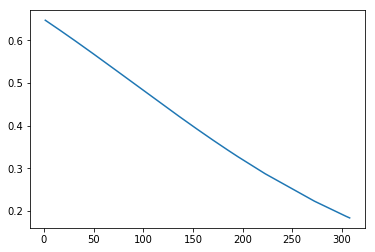

In [42]:
# ploting the probability of switching wells as a function of the distance
# to the nearest safe well

plt.plot(sorteda[:,0],sorteda[:,1])

### Problem 5. Part 3
#### Rule of 4
Beta1 = -0.0684 <br>
Beta1/4 = -0.00171 (this is the change in probability of swtiching for 1 meter increase in the distance from a well, based on the rule of 4)<br><br>
Hence, the probability of switching decreases approximately by 0.171 for very 100m additional distance from a well.


### Problem 5. Part 4
Solving a logistic regression incorporating the constant term, the distance and also arsenic
levels.

In [43]:
y=df['switch'].values
X=df[{'dist','arsenic'}].values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train[:,], y_train)
print("beta1 (distance), beta2 (arsenic) = ",logreg.coef_)
print("beta0 (constant term) = ",logreg.intercept_)

beta1 (distance), beta2 (arsenic) =  [[-0.00943456  0.42792299]]
beta0 (constant term) =  [0.05184207]


In [45]:
y_pred = logreg.predict(X_test)
accuracy_score(y_pred,y_test)

0.6158940397350994

### Problem 5. Part 5

In [46]:
### Extracting X and y

y=df['switch'].values
X=df[{'dist','arsenic'}]

### Normalizing the two columns in the DataFrame usgin Std. Deviation

normalized_df=(X-X.mean())/X.std()
normalized_df = normalized_df[{'dist','arsenic'}].values

In [47]:
### Running Logistic Regression on the Normalized Data and finding values of beta

X_train, X_test, y_train, y_test = train_test_split(normalized_df, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train[:,], y_train)
print("beta1 (distance), beta2 (arsenic) = ",logreg.coef_)
print("beta0 (constant term) = ",logreg.intercept_)

beta1 (distance), beta2 (arsenic) =  [[-0.36215566  0.47322241]]
beta0 (constant term) =  [0.30428176]


Here you can see that the absolute value of beta2 is greater than the absolute value of beta1. Therefore Arsenic is the factor which is more significant. Moving one unit in the Arsenic (normalized) feature predicts a larger change in probability
of switching wells, than moving one unit in the Distance (normalized) feature.

### Problem 5. Part 6

In [48]:
y=df['switch'].values
X=df.iloc[:,1:].values

In [49]:
### Fitting the logistic regression model for all features in the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("beta1 (arsenic), beta2 (distance), beta3 (assoc), beta4(educ) = ",logreg.coef_)
print("beta0 (constant term) = ",logreg.intercept_)

beta1 (arsenic), beta2 (distance), beta3 (assoc), beta4(educ) =  [[ 0.42990148 -0.00939281 -0.12931156  0.03448078]]
beta0 (constant term) =  [-0.06456423]


In [50]:
y_pred = logreg.predict(X_test)
print("Accuracy: ",accuracy_score(y_pred,y_test))
print("Mean-Squared Error: ",mean_squared_error(y_pred,y_test))

Accuracy:  0.6258278145695364
Mean-Squared Error:  0.3741721854304636


In [51]:
### Considering all the interaction terms

y=df['switch'].values
df['arsXdis']=df['arsenic']*df['dist']
df['assocXdis']=df['assoc']*df['dist']
df['assocXeduc']=df['assoc']*df['educ']
df['arsXassoc']=df['arsenic']*df['assoc']
df['arsXeduc']=df['arsenic']*df['educ']
df['educXdis']=df['educ']*df['dist']
X=df.iloc[:,1:].values

In [52]:
df.head()

,switch,arsenic,dist,assoc,educ,arsXdis,assocXdis,assocXeduc,arsXassoc,arsXeduc,educXdis
1,1,2.36,16.826000,0,0,39.709361,0.000000,0,0.0,0.0,0.000000
2,1,0.71,47.321999,0,0,33.598619,0.000000,0,0.0,0.0,0.000000
3,0,2.07,20.966999,0,10,43.401688,0.000000,0,0.0,20.7,209.669991
4,1,1.15,21.486000,0,12,24.708900,0.000000,0,0.0,13.8,257.832001
5,1,1.10,40.874001,1,14,44.961401,40.874001,14,1.1,15.4,572.236008


In [53]:
### Fitting the logistic regression model with all the interaction terms

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("beta1 (arsenic), beta2 (distance), beta3 (assoc), beta4 (educ), beta5 (arsXdis), beta6 (assocXdis), beta7 (assocXeduc), beta8 (arsXassoc), beta9 (arsXeduc), beta10 (educXdis) = ",logreg.coef_)
print("beta0 (constant term) = ",logreg.intercept_)

beta1 (arsenic), beta2 (distance), beta3 (assoc), beta4 (educ), beta5 (arsXdis), beta6 (assocXdis), beta7 (assocXeduc), beta8 (arsXassoc), beta9 (arsXeduc), beta10 (educXdis) =  [[ 0.4443002  -0.01438584  0.06844262 -0.04353397 -0.00066834  0.0020119
  -0.01584688 -0.14627987  0.02319535  0.00104211]]
beta0 (constant term) =  [0.17858028]


In [54]:
y_pred = logreg.predict(X_test)
print("Accuracy: ",accuracy_score(y_pred,y_test))
print("Mean-Squared Error: ",mean_squared_error(y_pred,y_test))

Accuracy:  0.6335540838852097
Mean-Squared Error:  0.36644591611479027


In [55]:
# checking if k-fold cross-validatoin improves the above model

from sklearn.linear_model import LogisticRegressionCV
for i in range(2,11):
    clf = LogisticRegressionCV(cv=i, random_state=0,multi_class='multinomial').fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    print("\naccuracy for cv=", i," is ",accuracy_score(y_pred,y_test))

    print("mse for cv=", i," is ",mean_squared_error(y_pred,y_test))


accuracy for cv= 2  is  0.6313465783664459
mse for cv= 2  is  0.3686534216335541

accuracy for cv= 3  is  0.6335540838852097
mse for cv= 3  is  0.36644591611479027

accuracy for cv= 4  is  0.6335540838852097
mse for cv= 4  is  0.36644591611479027

accuracy for cv= 5  is  0.6313465783664459
mse for cv= 5  is  0.3686534216335541

accuracy for cv= 6  is  0.6335540838852097
mse for cv= 6  is  0.36644591611479027

accuracy for cv= 7  is  0.6324503311258278
mse for cv= 7  is  0.3675496688741722

accuracy for cv= 8  is  0.6346578366445916
mse for cv= 8  is  0.36534216335540837

accuracy for cv= 9  is  0.630242825607064
mse for cv= 9  is  0.369757174392936

accuracy for cv= 10  is  0.6346578366445916
mse for cv= 10  is  0.36534216335540837


 Accuracy is best for CV folds = 8, 10. Hence making them our best models.